<a href="https://colab.research.google.com/github/mshafi710/kttsdataenrichment/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
from wordcloud import WordCloud
!pip install arabic_reshaper
!pip install python-bidi
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
# !pip install fonttools
!pip install --upgrade arabic-reshaper
# !pip install --upgrade arabic-reshaper
from google.colab import drive
import matplotlib.font_manager as font_manager
drive.mount('/content/drive')
!pip install docx2txt
import docx2txt
from collections import Counter
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
FONT_DIR = "/content/drive/MyDrive/PhD/Dataset/Text/fonts/"
FONT_URL = "/content/drive/MyDrive/PhD/Dataset/Text/fonts/afan.ttf"
WORKING_DIR= '''/content/drive/MyDrive/PhD/Dataset/Text/text_files/'''
ENRICHED_FILENAME_INITIAL="/processed/initial_kashmiri_enriched.csv"
ENRICHED_FILENAME_FINAL = "/processed/final_kashmiri_enriched.csv"
TOKEN_DELIMITER_PATTERN = r'[۔;,:\-\s+\n+\(\)\"\?,]'
SENTENCE_DELIMITER = r'[۔]'
CORPUS_FILE = "Corpus316.docx"

In [208]:
#checking available fonts in the FONT_DIR
for font in font_manager.findSystemFonts(fontpaths=FONT_DIR):
    print(font)

/content/drive/MyDrive/PhD/Dataset/Text/fonts/afan.ttf
/content/drive/MyDrive/PhD/Dataset/Text/fonts/NotoNaskhArabic-VariableFont_wght.ttf
/content/drive/MyDrive/PhD/Dataset/Text/fonts/Gulmarg Nastaleeq-8.11.2013.ttf


In [250]:
# current font
font_directory = plt.rcParams["font.family"]
print(font_directory)

['Afan Koshur Naksh']


In [270]:
import pandas as pd
df=pd.read_csv(WORKING_DIR+ENRICHED_FILENAME_FINAL)

In [271]:
df

,Unnamed: 0,sentence,richness,Deleted
0,0,واتہِ,35,False
1,1,ڈٔٹِتھ,26,False
2,2,چھےٚ,21,False
3,3,منٛگنہٕ,14,False
4,4,ڈاکٹَرَن,10,False
5,5,دِنہٕ آو,11,False
6,6,منٛز,11,False
7,7,قونوٗنَس,1,False
8,8,یَتھ میٖر,4,False
9,9,اِسلٲمی,6,False


In [251]:
# Create a counter from the word frequency data
counts = Counter(dict(zip(df['sentence'], df['richness'])))
counts

Counter({' واتہِ': 35,
         ' ڈٔٹِتھ ': 26,
         '  چھےٚ': 21,
         ' منٛگنہٕ': 14,
         '    ڈاکٹَرَن': 10,
         ' دِنہٕ آو': 11,
         '  منٛز': 11,
         '   قونوٗنَس': 1,
         '   یَتھ میٖر': 4,
         'اِسلٲمی  ': 6})

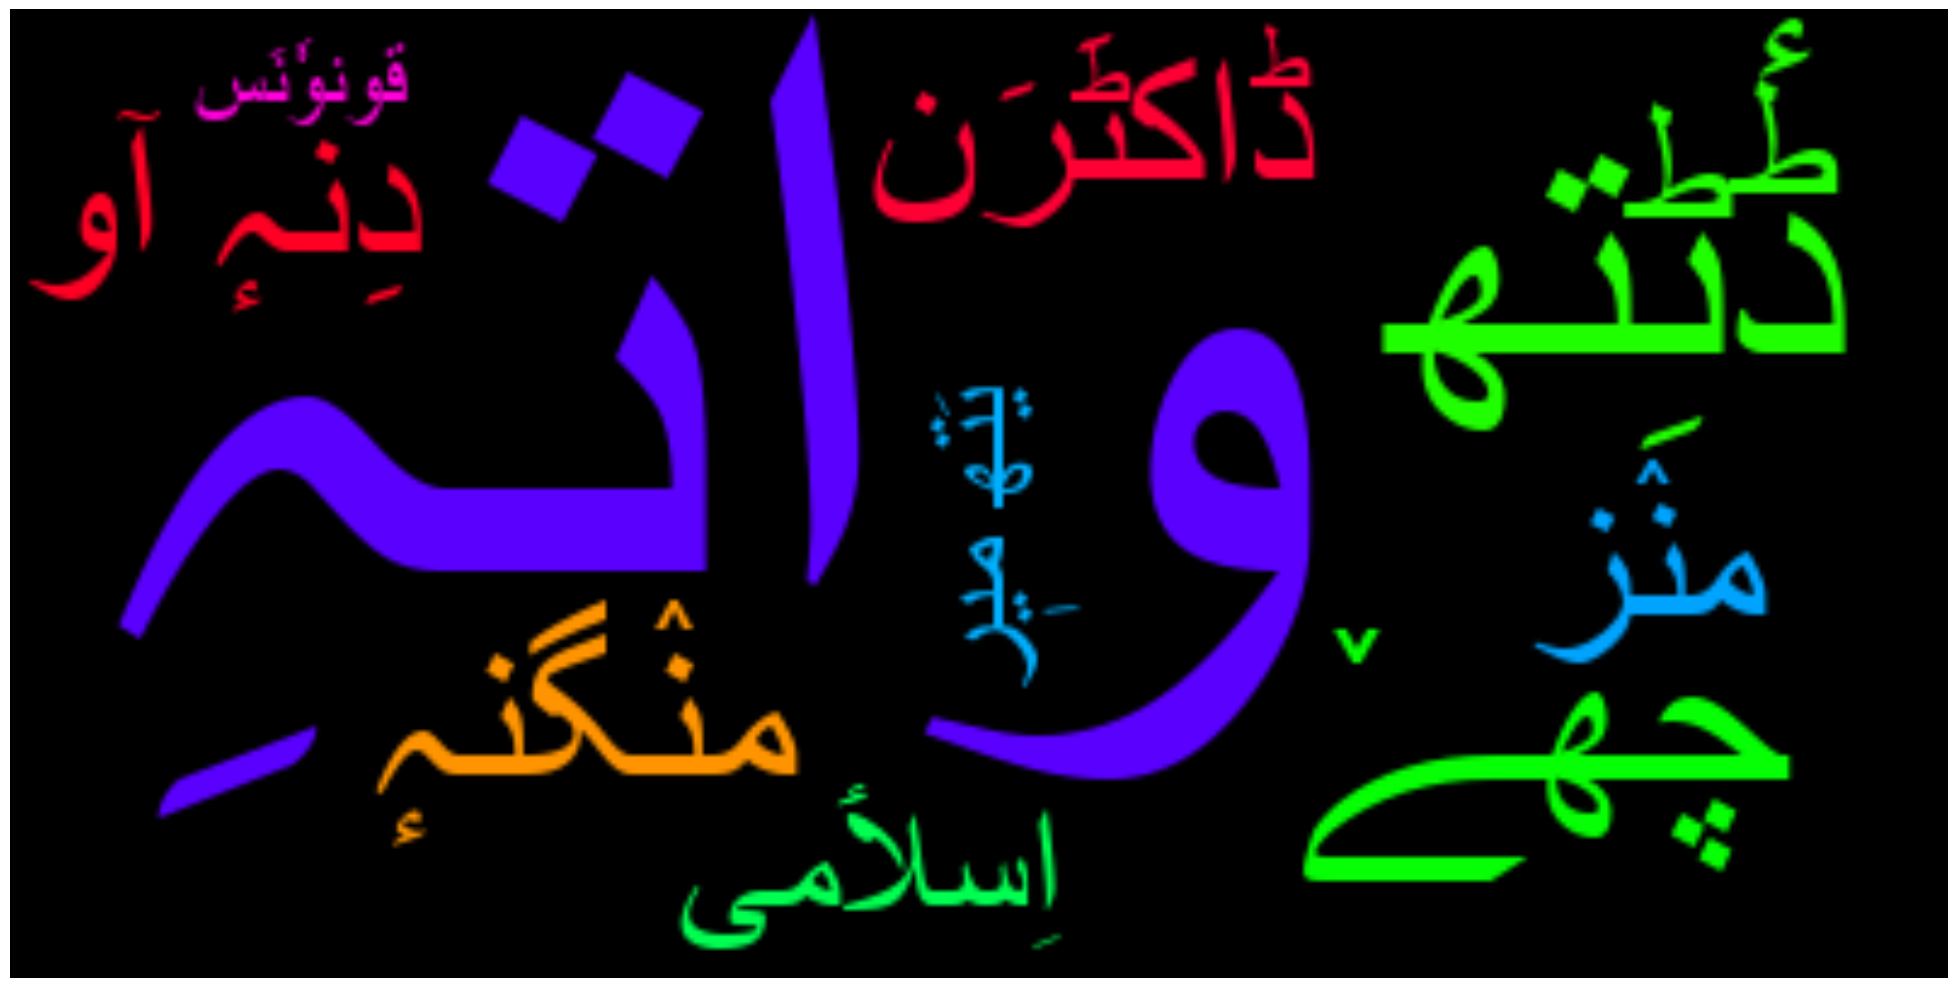

In [254]:
cloud = WordCloud(max_font_size=200,colormap="hsv",font_path= FONT_URL).generate_from_frequencies(counts)
plt.figure(figsize=(25,25))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [230]:
!pip install --upgrade arabic-reshaper[with-fonttools]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [272]:
import plotly.graph_objects as go

# Data
x = df['sentence']
y =df['richness']

# Create a bar trace
trace = go.Bar(
    x=x,
    y=y,
)

# Create the layout
layout = go.Layout(
    title='Richness Graph',
    xaxis=dict(
        title='Words',
        tickfont=dict(
            family='Afan Koshur Naksh',
            size=20,
        ),
    ),
    yaxis=dict(
        title='Richness',
        tickfont=dict(
            family='Afan Koshur Naksh',
            size=20,
        ),
    ),
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()


In [278]:
import plotly.express as px

# Data
x = df['sentence']
y =df['richness']

# Create the bar chart using Plotly Express
fig = px.bar(x=x, y=y, )
fig.update_traces(marker_color='magenta')
# Update the layout
fig.update_layout(
    title='Bar Graph',
    xaxis=dict(
        title='X-axis',
        tickfont=dict(
            family='Afan Koshur Naksh',
            size=20,
        ),
    ),
    yaxis=dict(
        title='Y-axis',
        tickfont=dict(
            family='Afan Koshur Naksh',
            size=20,
        ),
    ),
)

# Display the figure
fig.show()
